# Trabalho prático - Predição de Spam


## 1) Bibliotecas necessárias 

In [2]:
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

color = sns.color_palette()
py.init_notebook_mode(connected=True)

## 2) Carregar dados do DB

In [22]:
nomes = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your',	'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',	'word_freq_george',	'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',	'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21', 'char_freq_%24', 'char_freq_%23', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'class']

spam = pd.read_csv("./spambase.data", names=nomes)

spam.isnull().sum()


data = spam.drop_duplicates(subset ="class")
data


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.0,0.64,0.64,0.0,0.32,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1813,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.022,0.022,0.019,0.022,0.022,0.022,3.482,5,5902,0


## 3) Análise do DB


### 3.1) Visualização das classes do DB 

In [7]:
dist = spam['class'].value_counts()
colors = ['mediumturquoise', 'darkorange']
trace = go.Pie(values=(np.array(dist)),labels=dist.index)
layout = go.Layout(title='Spam')
data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

### 3.2) Gráfico de barras


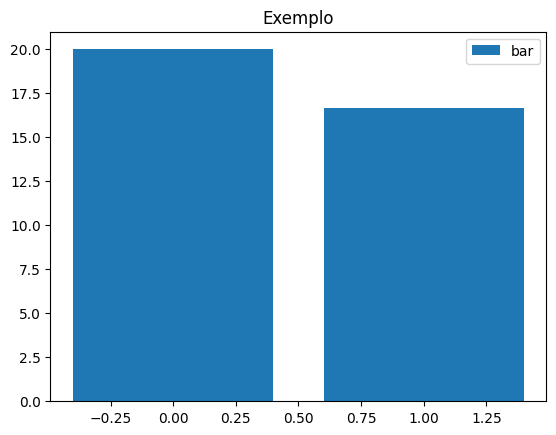

In [17]:
def barChart(x, y, title):
    # This will plot a simple bar chart
    plt.bar(x, y)
 
    # Title to the plot
    plt.title(title)
 
    # Adding the legends
    plt.legend(["bar"])
    plt.show()

barChart(spam['class'], spam['word_freq_free'], 'Exemplo')




### 3.3) Gráfico de pontos entre atributos 

In [18]:

def ScatterChart(x, y, title):
    fig = px.scatter(spam, x, y)
    fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                    marker_line_width=1.5)
    fig.update_layout(title_text=title)
    fig.show()

ScatterChart(spam['class'], spam['word_freq_all'], 'Exemplo')


## Referências 
1) https://towardsdatascience.com/a-beginners-guide-to-data-analysis-in-python-188706df5447
